In [7]:
# External libraries for data processing
import numpy as np
import pandas as pd
import sklearn as sk
#To render graphs within notebook
%matplotlib inline
import matplotlib.pyplot as plt
import joblib 
import os
from tqdm import tqdm

# Versions of libraries
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Scikit version: {}".format(sk.__version__))

Numpy version: 1.24.3
Pandas version: 1.5.3
Scikit version: 1.3.0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

In [9]:
def convert_to_days(duration_str):
    parts = duration_str.split(' days ')  # Split string into form ['22', '20:55:00']
    days = float(parts[0])  # Extract number of days and convert to float
    time_parts = parts[1].split(':')  # Split time part (hh:mm:ss) ['20', '55', '00']
    hours = float(time_parts[0])  # Extract hours and convert to float
    minutes = float(time_parts[1])  # Extract minutes and convert to float
    seconds = float(time_parts[2])  # Extract seconds and convert to float
    total_days = days + (hours / 24) + (minutes / (24 * 60)) + (seconds / (24 * 3600))  # Calculate total days
    return total_days

In [10]:
path = "C:/Project/Data/"

### emar

In [11]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "emar_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "emar_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "emar_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "emar_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [12]:
X_train['delay']= X_train['delay'].apply(convert_to_days)
X_test['delay']= X_test['delay'].apply(convert_to_days)

# drop unneeded columns 
X_train = X_train.drop(columns=['charttime'])
X_test = X_test.drop(columns=['charttime'])

In [13]:
X_train

,emar_seq,delay,enter_provider_id_N/A,enter_provider_id_P00SP9,enter_provider_id_P019KI,enter_provider_id_P01QR6,enter_provider_id_P02FO8,enter_provider_id_P02IVL,enter_provider_id_P048FQ,enter_provider_id_P04I42,...,medication_amLODIPine,medication_ibrutinib,medication_irbesartan,medication_moxifloxacin,medication_nitroglycerin,medication_rifAXIMin,medication_ruxolitinib,medication_sevelamer CARBONATE,medication_vancomycin,medication_venetoclax
0,43,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,326,0.082639,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,212,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,717,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,94,0.004861,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11292,2217,0.112500,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11293,66,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11294,456,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test

,emar_seq,delay,enter_provider_id_N/A,enter_provider_id_P00SP9,enter_provider_id_P019KI,enter_provider_id_P01QR6,enter_provider_id_P02FO8,enter_provider_id_P02IVL,enter_provider_id_P048FQ,enter_provider_id_P04I42,...,medication_amLODIPine,medication_ibrutinib,medication_irbesartan,medication_moxifloxacin,medication_nitroglycerin,medication_rifAXIMin,medication_ruxolitinib,medication_sevelamer CARBONATE,medication_vancomycin,medication_venetoclax
0,101,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1465,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72,0.070139,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,78,0.000694,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,628,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,787,0.018750,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2820,2037,-0.013194,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2821,585,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2822,809,0.052778,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y_train

,careunit
0,Medicine/Cardiology
1,Neurology
2,Medicine/Cardiology
3,Medical Intensive Care Unit (MICU)
4,PACU
...,...
11291,Medicine/Cardiology
11292,Vascular
11293,Cardiac Surgery
11294,Med/Surg


In [16]:
y_test

,careunit
0,Medicine
1,Medicine/Cardiology
2,Medicine
3,Medicine/Cardiology
4,Medicine/Cardiology
...,...
2819,Medicine/Cardiology
2820,Medicine/Cardiology
2821,Surgical Intensive Care Unit (SICU)
2822,PACU


#### Multinomial logistic regression

Models the probability of each class as a function of input features
Hypothesis function maps features to class probabilities (typically softmax function)
Define cost function (typically cross-entropy loss)
Optomization algorithm to minimize cost function and learn weights e.g. gradient descent (compute gradient of cost function wrt weights) , may use mini-batch GD or SGD for efficiency 
L1 or L1 regularization terms to keep model weights small 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4118271954674221
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.44      0.41      0.42       170
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00         8
                 Cardiology Surgery Intermediate       0.00      0.00      0.00         3
                        Coronary Care Unit (CCU)       0.39      0.19      0.26        99
                                Discharge Lounge       0.50      0.80      0.62         5
                            Emergency Department       0.00      0.00      0.00         1
                Emergency Department Observation       0.26      0.18      0.21        33
                             Hematology/Oncology       0.57      0.51      0.54       294
                Hematology/Oncology Intermediate       0.52      0.62      0.57       128
                                        Med/Sur

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

#### Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
# You can specify hyperparameters like max_depth, min_samples_split, etc.
# Here, we're using a default configuration.
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5286827195467422
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.34      0.37      0.36       170
    Cardiac Vascular Intensive Care Unit (CVICU)       0.12      0.12      0.12         8
                 Cardiology Surgery Intermediate       0.00      0.00      0.00         3
                        Coronary Care Unit (CCU)       0.42      0.46      0.44        99
                                Discharge Lounge       0.83      1.00      0.91         5
                            Emergency Department       0.00      0.00      0.00         1
                Emergency Department Observation       0.42      0.52      0.47        33
                             Hematology/Oncology       0.65      0.59      0.62       294
                Hematology/Oncology Intermediate       0.81      0.80      0.80       128
                                        Med/Sur

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K Neighbours classifier

Lazy K star implementation is too involved so using parameters of the sklearn implementation to get a similar functionality
Hamming distance metric only considers shared attributes so lazy classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier with algorithm='auto' and metric='hamming'
clf = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='hamming')

# Train the classifier (lazy learning)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.27939093484419264
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.25      0.34      0.29       170
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00         8
                 Cardiology Surgery Intermediate       0.00      0.00      0.00         3
                        Coronary Care Unit (CCU)       0.16      0.24      0.19        99
                                Discharge Lounge       0.57      0.80      0.67         5
                            Emergency Department       0.00      0.00      0.00         1
                Emergency Department Observation       0.16      0.27      0.20        33
                             Hematology/Oncology       0.28      0.51      0.36       294
                Hematology/Oncology Intermediate       0.30      0.23      0.26       128
                                        Med/Su

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Multiclass SVM

In [ ]:
# Won't run fit??

In [ ]:
from sklearn.svm import SVC

# Instantiate the SVM classifier with 'linear' kernel
# For multiclass classification, 'ovo' (one-vs-one) or 'ovr' (one-vs-rest) strategies can be used
clf = SVC(kernel='linear', decision_function_shape='ovr')

for i in tqdm(range(100)):
    # Train the classifier
    clf.fit(X_train, np.ravel(y_train))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

In [ ]:
for i in tqdm(range(100)):
    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# You can further explore different kernels (e.g., polynomial or radial basis function) 

#### XGBoost

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the labels column
y_train_encoded = label_encoder.fit_transform(np.ravel(y_train))

y_train_encoded

array([15, 20, 15, ...,  0,  9, 12])

In [ ]:
# 42 minutes to train 

In [31]:
import xgboost as xgb

# Instantiate the XGBClassifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=29, random_state=42)

for i in tqdm(range(100)):
    # Train the classifier
    clf.fit(X_train, y_train_encoded)

# Make predictions on the testing set
y_pred = clf.predict(X_test)


In [29]:
y_test_encoded = label_encoder.fit_transform(np.ravel(y_test))

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.535056657223796
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       170
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         3
           3       0.69      0.44      0.54        99
           4       1.00      0.80      0.89         5
           5       0.00      0.00      0.00         1
           6       0.59      0.48      0.53        33
           7       0.78      0.63      0.70       294
           8       0.84      0.78      0.81       128
           9       0.63      0.48      0.54       127
          10       0.20      0.37      0.26        27
          11       0.56      0.61      0.58       122
          12       0.56      0.49      0.53       196
          13       0.65      0.60      0.63       118
          14       0.52      0.60      0.56       380
          15       0.52      0.60      0.56       309
          16       0.39      0

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_cla

#### LightGBM

Cannot use
LightGBMError: Do not support special JSON characters in feature name

In [32]:
# Known for efficiency and speed 

# We set the parameters for LightGBM, including the objective function ('multiclass'), the number of classes 
# ('num_class': 3 for Iris dataset), and the evaluation metric ('multi_logloss').
# After that, we train the LightGBM model using the lgb.train() function. We specify the number of boosting rounds 
# (num_round) and use early stopping to prevent overfitting

In [34]:
# import lightgbm as lgb

# # Convert the dataset into LightGBM format
# train_data = lgb.Dataset(X_train, label=y_train_encoded)
# test_data = lgb.Dataset(X_test, label=y_test)

# # Set parameters for LightGBM
# params = {
#     'objective': 'multiclass',
#     'num_class': 3,
#     'metric': 'multi_logloss',
#     'random_state': 42
# }

# # Train the LightGBM model
# num_round = 100
# for i in tqdm(range(100)):
#     bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# # Make predictions on the testing set
# y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
# y_pred = [np.argmax(pred) for pred in y_pred]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

#### CatBoost

In [ ]:
# 16 minutes to train

In [ ]:
from catboost import CatBoostClassifier

# Instantiate the CatBoostClassifier
clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass', random_state=42)

for i in tqdm(range(100)):
    # Train the classifier
    clf.fit(X_train, y_train, verbose=False)

# Make predictions on the testing set
y_pred = clf.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.3742917847025496
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.23      0.19      0.21       170
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00         8
                 Cardiology Surgery Intermediate       0.00      0.00      0.00         3
                        Coronary Care Unit (CCU)       0.89      0.17      0.29        99
                                Discharge Lounge       0.00      0.00      0.00         5
                            Emergency Department       0.00      0.00      0.00         1
                Emergency Department Observation       1.00      0.09      0.17        33
                             Hematology/Oncology       0.60      0.56      0.58       294
                Hematology/Oncology Intermediate       0.82      0.53      0.64       128
                                        Med/Sur

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### AdaBoost

In [ ]:
# 13 minutes to train

In [37]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=42)

for i in tqdm(range(100)):
    # Train the classifier
    clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [12:42<00:00,  7.62s/it]


Accuracy: 0.18803116147308782
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.00      0.00      0.00       170
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00         8
                 Cardiology Surgery Intermediate       0.00      0.00      0.00         3
                        Coronary Care Unit (CCU)       0.00      0.00      0.00        99
                                Discharge Lounge       0.00      0.00      0.00         5
                            Emergency Department       0.00      0.00      0.00         1
                Emergency Department Observation       0.00      0.00      0.00        33
                             Hematology/Oncology       0.00      0.00      0.00       294
                Hematology/Oncology Intermediate       0.00      0.00      0.00       128
                                        Med/Su

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Bootstrap Aggregating

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=10, random_state=42)


# Train the BaggingClassifier
bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.5446175637393768
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.36      0.42      0.39       170
    Cardiac Vascular Intensive Care Unit (CVICU)       0.25      0.12      0.17         8
                 Cardiology Surgery Intermediate       0.00      0.00      0.00         3
                        Coronary Care Unit (CCU)       0.47      0.47      0.47        99
                                Discharge Lounge       1.00      1.00      1.00         5
                            Emergency Department       0.00      0.00      0.00         1
                Emergency Department Observation       0.49      0.55      0.51        33
                             Hematology/Oncology       0.70      0.61      0.65       294
                Hematology/Oncology Intermediate       0.82      0.80      0.81       128
                                        Med/Sur

In [20]:
y_test

,careunit
0,Medicine
1,Medicine/Cardiology
2,Medicine
3,Medicine/Cardiology
4,Medicine/Cardiology
...,...
2819,Medicine/Cardiology
2820,Medicine/Cardiology
2821,Surgical Intensive Care Unit (SICU)
2822,PACU


In [53]:
y_score = bagging_clf.predict_proba(X_test)

In [54]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(2824, 29)

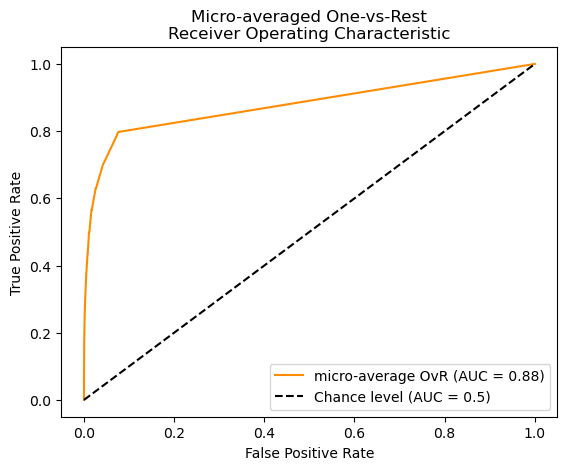

In [57]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [55]:
class_of_interest = "PACU"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

21

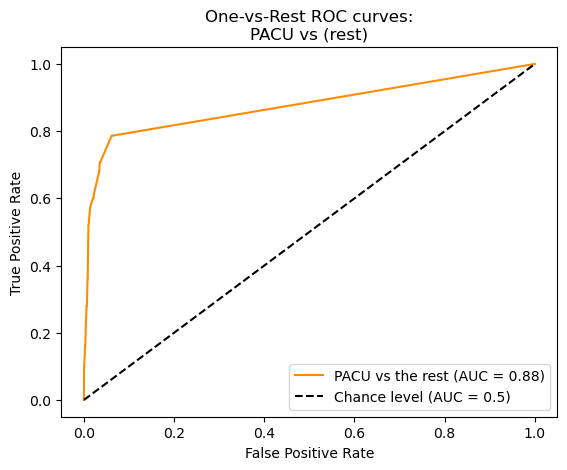

In [56]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nPACU vs (rest)",
)

#### ROC curve using micro-averaged OvR

In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferable over macro-averaging

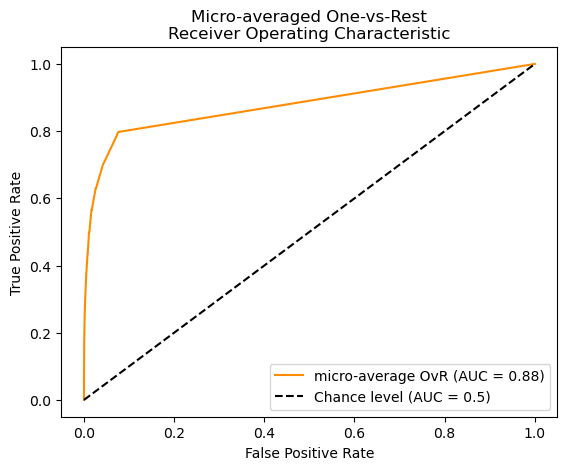

In [57]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [89]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n {roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
 0.88


In [65]:
label_binarizer.classes_

array(['Cardiac Surgery', 'Cardiac Vascular Intensive Care Unit (CVICU)',
       'Cardiology Surgery Intermediate', 'Coronary Care Unit (CCU)',
       'Discharge Lounge', 'Emergency Department',
       'Emergency Department Observation', 'Hematology/Oncology',
       'Hematology/Oncology Intermediate', 'Med/Surg', 'Med/Surg/GYN',
       'Med/Surg/Trauma', 'Medical Intensive Care Unit (MICU)',
       'Medical/Surgical Intensive Care Unit (MICU/SICU)', 'Medicine',
       'Medicine/Cardiology', 'Medicine/Cardiology Intermediate',
       'Neuro Intermediate', 'Neuro Stepdown',
       'Neuro Surgical Intensive Care Unit (Neuro SICU)', 'Neurology',
       'PACU', 'Psychiatry', 'Surgery/Trauma',
       'Surgical Intensive Care Unit (SICU)', 'Transplant',
       'Trauma SICU (TSICU)', 'Unknown', 'Vascular'], dtype='<U48')

In [66]:
class_of_interest = "Cardiac Vascular Intensive Care Unit (CVICU)"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

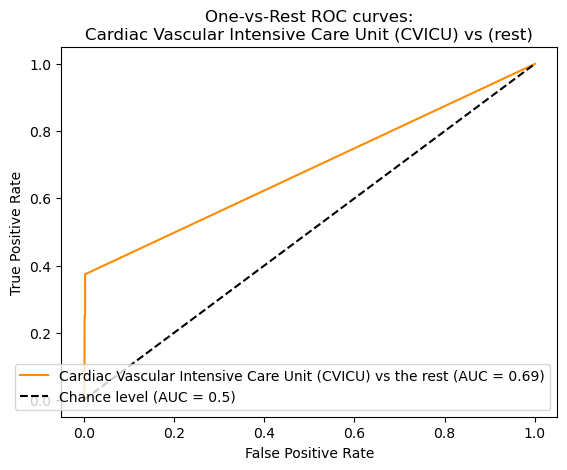

In [67]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nCardiac Vascular Intensive Care Unit (CVICU) vs (rest)",
)

In [70]:
class_of_interest = "Cardiac Surgery"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

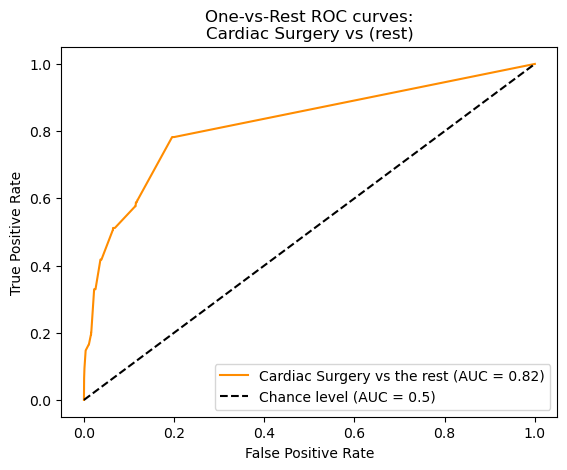

In [71]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nCardiac Surgery vs (rest)",
)

In [74]:
class_of_interest = "Cardiology Surgery Intermediate"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

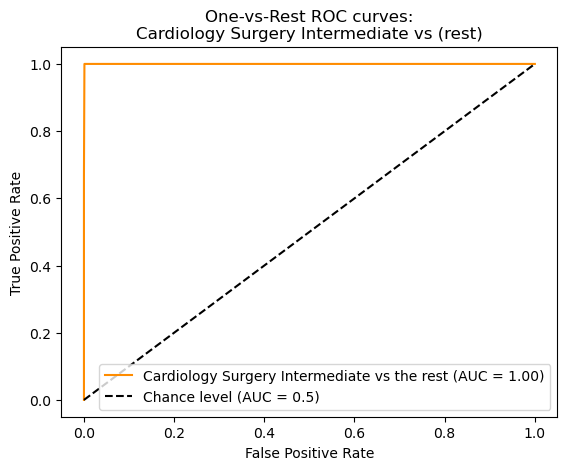

In [75]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nCardiology Surgery Intermediate vs (rest)",
)

In [78]:
class_of_interest = "Coronary Care Unit (CCU)"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

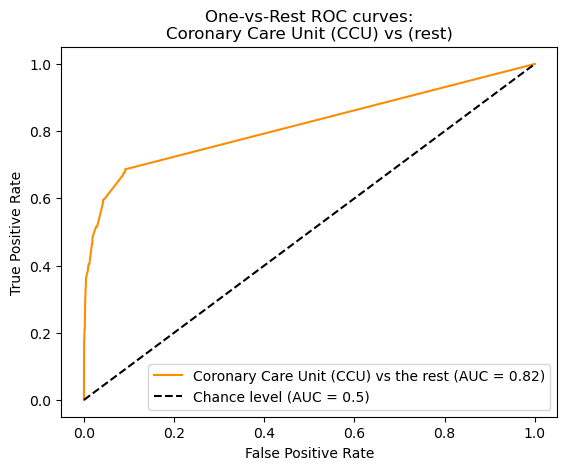

In [79]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nCoronary Care Unit (CCU) vs (rest)",
)

In [65]:
label_binarizer.classes_

array(['Cardiac Surgery', 'Cardiac Vascular Intensive Care Unit (CVICU)',
       'Cardiology Surgery Intermediate', 'Coronary Care Unit (CCU)',
       'Discharge Lounge', 'Emergency Department',
       'Emergency Department Observation', 'Hematology/Oncology',
       'Hematology/Oncology Intermediate', 'Med/Surg', 'Med/Surg/GYN',
       'Med/Surg/Trauma', 'Medical Intensive Care Unit (MICU)',
       'Medical/Surgical Intensive Care Unit (MICU/SICU)', 'Medicine',
       'Medicine/Cardiology', 'Medicine/Cardiology Intermediate',
       'Neuro Intermediate', 'Neuro Stepdown',
       'Neuro Surgical Intensive Care Unit (Neuro SICU)', 'Neurology',
       'PACU', 'Psychiatry', 'Surgery/Trauma',
       'Surgical Intensive Care Unit (SICU)', 'Transplant',
       'Trauma SICU (TSICU)', 'Unknown', 'Vascular'], dtype='<U48')

In [82]:
class_of_interest = "Discharge Lounge"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

4

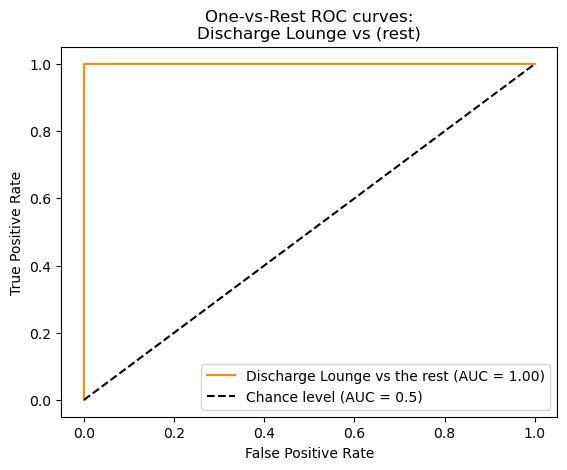

In [83]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nDischarge Lounge vs (rest)",
)

#### Linear DIscriminant Analysis

In [ ]:
# 7 minutes to train

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate the LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

for i in tqdm(range(100)):
    # Train the LDA model
    lda.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:53<00:00,  2.34s/it]
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.370042492917847
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.51      0.34      0.41       170
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00         8
                 Cardiology Surgery Intermediate       0.00      0.00      0.00         3
                        Coronary Care Unit (CCU)       0.31      0.20      0.25        99
                                Discharge Lounge       0.50      0.80      0.62         5
                            Emergency Department       0.00      0.00      0.00         1
                Emergency Department Observation       0.18      0.18      0.18        33
                             Hematology/Oncology       0.64      0.39      0.49       294
                Hematology/Oncology Intermediate       0.61      0.52      0.57       128
                                        Med/Surg

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_cla

#### Quadratic Discriminant Analysis

In [ ]:
# Cannot do because
# ValueError: y has only 1 sample in class Unknown, covariance is ill defined

In [46]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# # Instantiate the QuadraticDiscriminantAnalysis
# qda = QuadraticDiscriminantAnalysis()

# for i in tqdm(range(100)):
#     # Train the QDA model
#     qda.fit(X_train, np.ravel(y_train))

# # Make predictions on the testing set
# y_pred = qda.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

### microbiologyevents

In [90]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "microbio_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "microbio_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "microbio_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "microbio_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [91]:
X_train['delay']= X_train['delay'].apply(convert_to_days)
X_test['delay']= X_test['delay'].apply(convert_to_days)
X_train['days_since_admission']= X_train['days_since_admission'].apply(convert_to_days)
X_test['days_since_admission']= X_test['days_since_admission'].apply(convert_to_days)

In [92]:
X_train

,isolate_num,dilution_value,days_since_admission,delay,org_name_ACINETOBACTER BAUMANNII COMPLEX,org_name_ANAEROBIC GRAM POSITIVE ROD(S),org_name_BACTEROIDES FRAGILIS GROUP,org_name_BETA STREPTOCOCCUS GROUP B,org_name_BETA STREPTOCOCCUS GROUP G,org_name_CANCELLED,...,dilution_text_<=4,dilution_text_=>16,dilution_text_=>32,dilution_text_=>4,dilution_text_=>64,dilution_text_=>8,dilution_text_>256,dilution_comparison_<=,dilution_comparison_=,dilution_comparison_=>
0,1.0,0.25,1.415278,2.984722,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.00,0.045833,2.447917,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.00,1.260417,6.408333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.00,1.515972,5.911806,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.00,2.912500,5.792361,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,1.0,0.25,0.101389,3.805556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
920,1.0,0.00,5.572222,2.405556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,0.0,0.00,1.790972,1.869444,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
922,1.0,32.00,5.072222,1.825694,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [93]:
X_test

,isolate_num,dilution_value,days_since_admission,delay,org_name_ACINETOBACTER BAUMANNII COMPLEX,org_name_ANAEROBIC GRAM POSITIVE ROD(S),org_name_BACTEROIDES FRAGILIS GROUP,org_name_BETA STREPTOCOCCUS GROUP B,org_name_BETA STREPTOCOCCUS GROUP G,org_name_CANCELLED,...,dilution_text_<=4,dilution_text_=>16,dilution_text_=>32,dilution_text_=>4,dilution_text_=>64,dilution_text_=>8,dilution_text_>256,dilution_comparison_<=,dilution_comparison_=,dilution_comparison_=>
0,0.0,0.0,4.826389,2.144444,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,4.084722,7.147222,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,3.680556,1.890972,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,17.351389,6.334722,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,16.0,2.912500,5.792361,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.0,0.0,3.453472,23.179167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,1.0,16.0,2.912500,5.792361,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
228,0.0,0.0,16.738889,0.358333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,0.0,0.0,2.965278,2.803472,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y_train

,careunit
0,Medicine/Cardiology
1,Medicine/Cardiology
2,Coronary Care Unit (CCU)
3,Hematology/Oncology Intermediate
4,Surgical Intensive Care Unit (SICU)
...,...
919,Medicine
920,Neurology
921,Medicine
922,Medicine


In [95]:
y_test

,careunit
0,Hematology/Oncology
1,Medicine/Cardiology
2,Cardiac Surgery
3,Medical Intensive Care Unit (MICU)
4,Surgical Intensive Care Unit (SICU)
...,...
226,Med/Surg
227,Surgical Intensive Care Unit (SICU)
228,Hematology/Oncology
229,Hematology/Oncology Intermediate


#### Bootstrap Aggregating

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)


# Train the BaggingClassifier
bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6623376623376623
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.67      0.56      0.61        18
    Cardiac Vascular Intensive Care Unit (CVICU)       0.50      0.50      0.50         2
                        Coronary Care Unit (CCU)       0.00      0.00      0.00         1
                                Discharge Lounge       0.00      0.00      0.00         0
                             Hematology/Oncology       0.69      0.67      0.68        27
                Hematology/Oncology Intermediate       0.71      1.00      0.83         5
                                        Med/Surg       0.82      0.88      0.85        26
                                    Med/Surg/GYN       0.64      0.88      0.74         8
                                 Med/Surg/Trauma       0.52      0.92      0.67        12
              Medical Intensive Care Unit (MICU

In [97]:
y_score = bagging_clf.predict_proba(X_test)

In [98]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(231, 21)

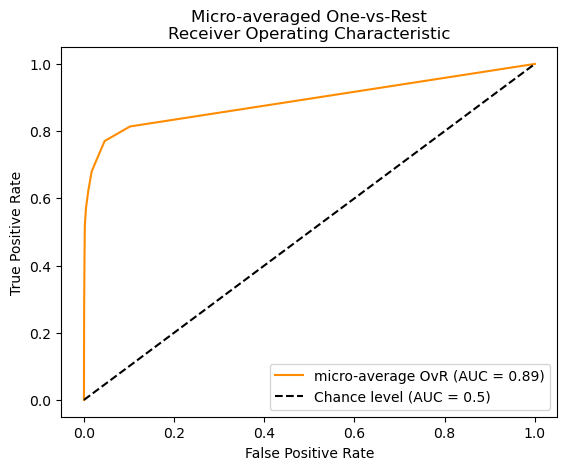

In [99]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### pharmacy

In [100]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "pharmacy_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "pharmacy_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "pharmacy_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "pharmacy_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [101]:
X_train

,lockout_interval,basal_rate,one_hr_max,doses_per_24_hrs,duration,expiration_value,medication_duration,verification_delay,,",",...,frequency_STAT,frequency_TID,frequency_TID W/MEALS,frequency_TID:PRN,frequency_TITRATE TO,frequency_TITRATE TO RASS,frequency_X1,frequency_X1 PRN,frequency_X1:PRN,frequency_X2 PRN
0,0.0,0.0,0.0,3.0,NaN,36.0,6 days 06:00:00,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,NaN,36.0,0 days 00:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,NaN,36.0,14 days 02:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,NaN,36.0,-2 days +00:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,4.0,0.0,0 days 14:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7132,0.0,0.0,0.0,1.0,NaN,365.0,6 days 00:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7133,0.0,0.0,0.0,0.0,NaN,0.0,0 days 20:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7134,0.0,0.0,0.0,0.0,NaN,365.0,4 days 09:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7135,0.0,0.0,0.0,0.0,NaN,36.0,4 days 23:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_test

,lockout_interval,basal_rate,one_hr_max,doses_per_24_hrs,duration,expiration_value,medication_duration,verification_delay,,",",...,frequency_STAT,frequency_TID,frequency_TID W/MEALS,frequency_TID:PRN,frequency_TITRATE TO,frequency_TITRATE TO RASS,frequency_X1,frequency_X1 PRN,frequency_X1:PRN,frequency_X2 PRN
0,0.0,0.0,0.0,1.0,NaN,365.0,7 days 20:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,1.0,1.0,36.0,0 days 23:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,2.0,NaN,36.0,1 days 14:00:00,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,NaN,365.0,3 days 19:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,NaN,0.0,0 days 23:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,0.0,0.0,0.0,2.0,NaN,36.0,3 days 05:00:00,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1781,0.0,0.0,0.0,0.0,10.0,0.0,0 days 10:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1782,0.0,0.0,0.0,2.0,NaN,365.0,0 days 15:00:00,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1783,0.0,0.0,0.0,1.0,3.0,365.0,1 days 23:00:00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
y_train

,careunit
0,Hematology/Oncology
1,Neurology
2,PACU
3,Hematology/Oncology
4,Medicine
...,...
7132,Medicine
7133,Med/Surg/GYN
7134,Medicine
7135,Cardiac Vascular Intensive Care Unit (CVICU)


In [104]:
y_test

,careunit
0,Medicine/Cardiology
1,Medicine
2,Neurology
3,Med/Surg
4,Medicine/Cardiology Intermediate
...,...
1780,Med/Surg
1781,Med/Surg
1782,Trauma SICU (TSICU)
1783,Hematology/Oncology Intermediate


In [105]:
X_train['medication_duration']= X_train['medication_duration'].apply(convert_to_days)
X_test['medication_duration']= X_test['medication_duration'].apply(convert_to_days)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

#### Bootstrap Aggregating

In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)


# Train the BaggingClassifier
bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.3971988795518207
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.52      0.66      0.58       229
    Cardiac Vascular Intensive Care Unit (CVICU)       0.48      0.56      0.52        55
                        Coronary Care Unit (CCU)       0.38      0.23      0.29        35
                                Discharge Lounge       0.50      0.36      0.42        11
                             Hematology/Oncology       0.36      0.35      0.35        94
                Hematology/Oncology Intermediate       0.48      0.65      0.55        62
                                        Med/Surg       0.33      0.43      0.37       115
                                    Med/Surg/GYN       0.35      0.28      0.31        46
                                 Med/Surg/Trauma       0.32      0.31      0.32       108
              Medical Intensive Care Unit (MICU

In [107]:
y_score = bagging_clf.predict_proba(X_test)

In [108]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1785, 23)

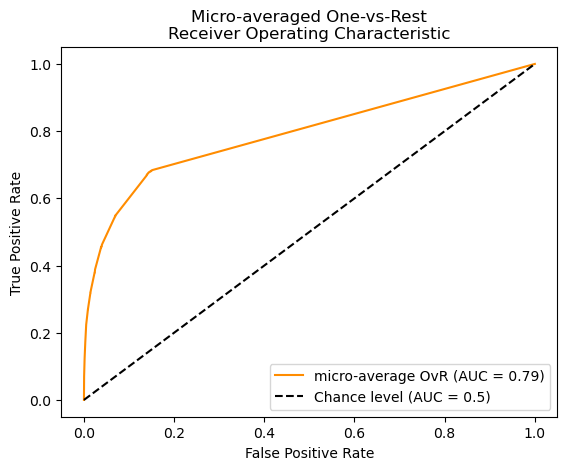

In [109]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### prescriptions

In [186]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "prescriptions_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "prescriptions_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "prescriptions_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "prescriptions_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [187]:
X_train

,poe_seq,doses_per_24_hrs,duration,formulary_drug_cd_5000MLBAG,formulary_drug_cd_AA5D151000I,formulary_drug_cd_ACD3/1000I,formulary_drug_cd_ACE250,formulary_drug_cd_ACE500I,formulary_drug_cd_ACET1000I,formulary_drug_cd_ACET1000PB,...,ndc_70860030005.0,ndc_70860077602.0,ndc_71019028507.0,ndc_76014000410.0,ndc_76045000905.0,ndc_76329301205.0,ndc_76329330101.0,ndc_76439034310.0,ndc_78112073623.0,ndc_87701071218.0
0,17.0,0.0,1 days 15:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,546.0,1.0,0 days 17:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,985.0,0.0,0 days 23:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,97.0,0.0,0 days 02:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,147.0,2.0,0 days 10:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8677,171.0,0.0,11 days 07:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8678,1928.0,0.0,4 days 06:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8679,45.0,0.0,0 days 02:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8680,95.0,1.0,4 days 04:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
X_test

,poe_seq,doses_per_24_hrs,duration,formulary_drug_cd_5000MLBAG,formulary_drug_cd_AA5D151000I,formulary_drug_cd_ACD3/1000I,formulary_drug_cd_ACE250,formulary_drug_cd_ACE500I,formulary_drug_cd_ACET1000I,formulary_drug_cd_ACET1000PB,...,ndc_70860030005.0,ndc_70860077602.0,ndc_71019028507.0,ndc_76014000410.0,ndc_76045000905.0,ndc_76329301205.0,ndc_76329330101.0,ndc_76439034310.0,ndc_78112073623.0,ndc_87701071218.0
0,1684.0,0.0,5 days 09:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,832.0,0.0,0 days 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,979.0,2.0,21 days 07:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,246.0,1.0,4 days 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,0.0,2 days 05:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,295.0,1.0,3 days 10:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2167,244.0,1.0,0 days 07:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2168,88.0,0.0,0 days 10:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2169,610.0,3.0,2 days 15:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
y_train

,careunit
0,Cardiac Vascular Intensive Care Unit (CVICU)
1,Medicine
2,Hematology/Oncology
3,Med/Surg
4,Cardiac Surgery
...,...
8677,Neurology
8678,Medical Intensive Care Unit (MICU)
8679,Med/Surg
8680,Med/Surg/GYN


In [190]:
y_test

,careunit
0,Vascular
1,Medical Intensive Care Unit (MICU)
2,Hematology/Oncology
3,Trauma SICU (TSICU)
4,Cardiac Surgery
...,...
2166,Cardiac Surgery
2167,Neurology
2168,Med/Surg
2169,Medical Intensive Care Unit (MICU)


In [191]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)

#### Bootstrap Aggregating

In [192]:
# Takes 20 minutes to train

In [193]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.5633348687240903
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.48      0.76      0.59       267
    Cardiac Vascular Intensive Care Unit (CVICU)       0.45      0.42      0.43        69
                        Coronary Care Unit (CCU)       0.56      0.47      0.51        32
                                Discharge Lounge       0.60      0.33      0.43         9
                            Emergency Department       0.60      0.50      0.55         6
                             Hematology/Oncology       0.57      0.61      0.59       145
                Hematology/Oncology Intermediate       0.72      0.82      0.76        77
                                        Med/Surg       0.51      0.59      0.55       125
                                    Med/Surg/GYN       0.53      0.62      0.57        45
                                 Med/Surg/Traum

In [194]:
y_score = bagging_clf.predict_proba(X_test)

In [195]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(2171, 25)

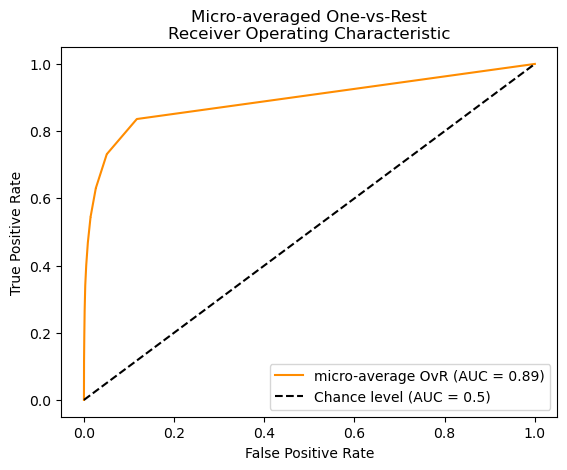

In [196]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### icustays

In [118]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "icustays_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "icustays_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "icustays_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "icustays_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [119]:
X_train

,icu_los,days_since_admission,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),last_careunit_Cardiac Vascular Intensive Care Unit (CVICU),last_careunit_Coronary Care Unit (CCU),last_careunit_Medical Intensive Care Unit (MICU),last_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),last_careunit_Surgical Intensive Care Unit (SICU),last_careunit_Trauma SICU (TSICU)
0,4.983889,0 days 10:40:36,0,0,0,0,0,1,0,0,0,0,0,1
1,1.928565,0 days 08:11:52,0,0,0,0,1,0,0,0,0,0,1,0
2,0.898449,0 days 05:23:10,1,0,0,0,0,0,1,0,0,0,0,0
3,1.148981,0 days 19:42:43,0,0,0,0,1,0,0,0,0,0,1,0
4,4.981134,0 days 02:08:18,0,0,1,0,0,0,0,0,1,0,0,0
5,0.023727,0 days 00:01:00,0,0,1,0,0,0,0,0,1,0,0,0
6,2.916701,6 days 19:47:51,0,0,0,1,0,0,0,0,0,1,0,0
7,7.128438,0 days 01:37:00,0,0,1,0,0,0,0,0,1,0,0,0
8,0.835590,0 days 01:25:00,0,1,0,0,0,0,0,1,0,0,0,0
9,5.126076,18 days 16:23:10,0,0,1,0,0,0,0,0,1,0,0,0


In [120]:
X_test

,icu_los,days_since_admission,first_careunit_Cardiac Vascular Intensive Care Unit (CVICU),first_careunit_Coronary Care Unit (CCU),first_careunit_Medical Intensive Care Unit (MICU),first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),first_careunit_Surgical Intensive Care Unit (SICU),first_careunit_Trauma SICU (TSICU),last_careunit_Cardiac Vascular Intensive Care Unit (CVICU),last_careunit_Coronary Care Unit (CCU),last_careunit_Medical Intensive Care Unit (MICU),last_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU),last_careunit_Surgical Intensive Care Unit (SICU),last_careunit_Trauma SICU (TSICU)
0,1.772106,0 days 01:18:00,0,0,0,1,0,0,0,0,0,1,0,0
1,2.199653,2 days 18:46:21,0,0,0,0,1,0,0,0,0,0,1,0
2,5.355197,0 days 01:10:00,0,0,0,0,1,0,0,0,0,0,1,0
3,12.911308,1 days 13:37:19,0,0,0,1,0,0,0,0,0,1,0,0
4,1.446539,0 days 00:01:54,1,0,0,0,0,0,1,0,0,0,0,0
5,4.672222,7 days 13:07:33,0,0,0,1,0,0,0,0,0,1,0,0
6,0.798125,0 days 02:10:09,0,0,0,0,0,1,0,0,0,0,0,1
7,3.165174,14 days 02:48:56,0,0,1,0,0,0,0,0,1,0,0,0
8,6.327037,0 days 02:14:00,0,1,0,0,0,0,0,1,0,0,0,0
9,0.118565,0 days 23:10:34,0,0,0,0,0,1,0,0,0,0,0,1


In [121]:
y_train

,careunit
0,Med/Surg/Trauma
1,Neurology
2,Vascular
3,Neurology
4,Medical Intensive Care Unit (MICU)
5,Medical Intensive Care Unit (MICU)
6,Coronary Care Unit (CCU)
7,Hematology/Oncology
8,Med/Surg
9,Medicine


In [122]:
y_test

,careunit
0,Medicine/Cardiology
1,Transplant
2,Neurology
3,Medicine
4,Vascular
5,Medical Intensive Care Unit (MICU)
6,Trauma SICU (TSICU)
7,Medical Intensive Care Unit (MICU)
8,Coronary Care Unit (CCU)
9,Med/Surg/Trauma


In [123]:
X_train['days_since_admission']= X_train['days_since_admission'].apply(convert_to_days)
X_test['days_since_admission']= X_test['days_since_admission'].apply(convert_to_days)

#### Bootstrap Aggregating

In [124]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.79it/s]

Accuracy: 0.0
Classification Report:
                                    precision    recall  f1-score   support

                   Cardiac Surgery       0.00      0.00      0.00       0.0
          Coronary Care Unit (CCU)       0.00      0.00      0.00       1.0
               Hematology/Oncology       0.00      0.00      0.00       0.0
                          Med/Surg       0.00      0.00      0.00       0.0
                   Med/Surg/Trauma       0.00      0.00      0.00       1.0
Medical Intensive Care Unit (MICU)       0.00      0.00      0.00       2.0
                          Medicine       0.00      0.00      0.00       1.0
               Medicine/Cardiology       0.00      0.00      0.00       1.0
                         Neurology       0.00      0.00      0.00       1.0
                              PACU       0.00      0.00      0.00       0.0
                        Transplant       0.00      0.00      0.00       1.0
               Trauma SICU (TSICU)       0.00     

In [125]:
y_score = bagging_clf.predict_proba(X_test)

In [126]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(10, 14)

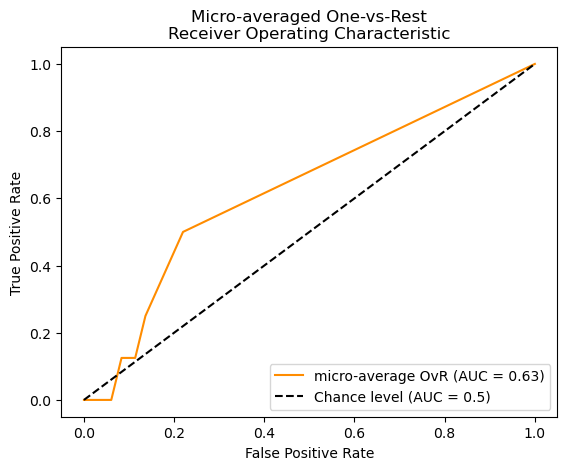

In [127]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### ingredientevents

In [176]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "ingredient_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "ingredient_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "ingredient_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "ingredient_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [177]:
X_train

,amount,rate,originalrate,duration,recording_delay,rateuom_N/A,rateuom_grams/hour,rateuom_mL/hour,rateuom_mcg/kg/min,amountuom_Kcal,...,linkorderid_9985393,linkorderid_9986202,linkorderid_9986595,linkorderid_9988568,linkorderid_9989506,linkorderid_9990254,linkorderid_9990509,linkorderid_9993006,linkorderid_9993329,linkorderid_9996112
0,17.000000,0.000000,17.000000,0 days 00:01:00,-1 days +23:59:00,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,349.999992,200.000000,350.000000,0 days 01:45:00,-1 days +22:15:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000.000000,0.000000,1000.000000,0 days 00:01:00,0 days 00:45:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,99.878731,20.042555,100.000000,0 days 04:59:00,-1 days +19:03:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,240.000000,0.000000,240.000000,0 days 00:01:00,-1 days +23:59:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15693,63.449714,1651.949048,97.110191,0 days 06:53:00,-1 days +17:07:00,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
15694,60.000000,0.000000,60.000000,0 days 00:01:00,0 days 02:54:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15695,35.029239,100.083542,131.666733,0 days 00:21:00,0 days 00:00:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15696,1.100022,1.000020,73.668129,0 days 01:06:00,0 days 00:18:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
X_test

,amount,rate,originalrate,duration,recording_delay,rateuom_N/A,rateuom_grams/hour,rateuom_mL/hour,rateuom_mcg/kg/min,amountuom_Kcal,...,linkorderid_9985393,linkorderid_9986202,linkorderid_9986595,linkorderid_9988568,linkorderid_9989506,linkorderid_9990254,linkorderid_9990509,linkorderid_9993006,linkorderid_9993329,linkorderid_9996112
0,12.666667,4.000000,21.466667,0 days 03:10:00,-1 days +21:27:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,150.000000,0.000000,150.000000,0 days 00:01:00,-1 days +23:59:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,146.800007,44.938778,146.800003,0 days 03:16:00,0 days 00:14:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,99.999998,100.000000,100.000000,0 days 01:00:00,-1 days +22:45:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.456359,74.812965,653.750000,0 days 00:14:00,0 days 00:00:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,140.000000,0.000000,140.000000,0 days 00:01:00,0 days 03:59:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3921,30.000000,0.000000,30.000000,0 days 00:01:00,0 days 01:00:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3922,948.000000,180.000000,948.000000,0 days 05:16:00,0 days 00:15:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3923,100.000000,0.000000,100.000000,0 days 00:01:00,-1 days +23:59:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
y_train

,careunit
0,Hematology/Oncology
1,Medicine
2,Medical Intensive Care Unit (MICU)
3,Medicine
4,Medicine/Cardiology
...,...
15693,Medical/Surgical Intensive Care Unit (MICU/SICU)
15694,Medicine
15695,Trauma SICU (TSICU)
15696,Cardiac Surgery


In [180]:
y_test

,careunit
0,Med/Surg/Trauma
1,Med/Surg/Trauma
2,Cardiac Vascular Intensive Care Unit (CVICU)
3,Neurology
4,Med/Surg/Trauma
...,...
3920,Vascular
3921,Cardiac Surgery
3922,Hematology/Oncology
3923,Medical Intensive Care Unit (MICU)


In [181]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)

#### Bootstrap Aggregating

In [182]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=3, random_state=42)

bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.630063694267516
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.54      0.76      0.63       456
    Cardiac Vascular Intensive Care Unit (CVICU)       0.74      0.72      0.73        74
                        Coronary Care Unit (CCU)       0.36      0.44      0.40        18
                             Hematology/Oncology       0.70      0.60      0.65       231
                Hematology/Oncology Intermediate       0.73      0.46      0.56        35
                                        Med/Surg       0.65      0.55      0.60       154
                                    Med/Surg/GYN       0.72      0.55      0.63        56
                                 Med/Surg/Trauma       0.61      0.65      0.63       590
              Medical Intensive Care Unit (MICU)       0.88      0.53      0.66       205
Medical/Surgical Intensive Care Unit (MICU/SICU)

In [183]:
y_score = bagging_clf.predict_proba(X_test)

In [184]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(3925, 20)

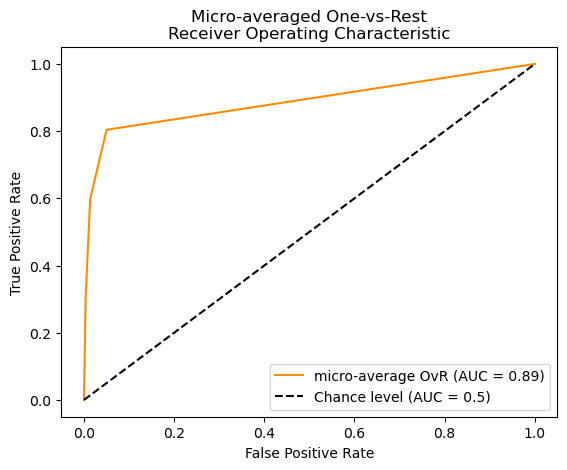

In [185]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### inputevents

In [128]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "input_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "input_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "input_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "input_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [129]:
X_train

,amount,rate,patientweight,totalamount,isopenbag,originalamount,originalrate,duration,recording_delay,rateuom_N/A,...,itemid_229070,itemid_229071,itemid_229072,itemid_229295,itemid_229296,itemid_229420,itemid_229615,itemid_229616,itemid_229639,itemid_229654
0,312.000015,50.000004,80.0,100.0,0,1000.000000,50.000004,0 days 01:18:00,-1 days +22:42:00,0,...,0,0,0,0,0,0,0,0,0,0
1,50.000000,0.000000,69.9,50.0,0,50.000000,0.000000,0 days 00:01:00,-1 days +23:59:00,1,...,0,0,0,0,0,0,0,0,0,0
2,50.000000,0.000000,43.0,50.0,0,50.000000,0.000000,0 days 00:01:00,-1 days +23:59:00,1,...,0,0,0,0,0,0,0,0,0,0
3,0.273831,100.182121,112.5,50.0,0,2.224043,100.000000,0 days 02:44:00,-1 days +21:33:00,0,...,0,0,0,0,0,0,0,0,0,0
4,99.999997,0.000000,143.0,0.0,0,100.000000,100.000000,0 days 00:01:00,-1 days +23:59:00,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12628,0.075499,0.040004,69.9,250.0,0,3.056317,0.040000,0 days 00:27:00,0 days 00:31:00,0,...,0,0,0,0,0,0,0,0,0,0
12629,240.000000,0.000000,74.8,240.0,0,240.000000,240.000000,0 days 00:01:00,0 days 00:59:00,1,...,0,0,0,0,0,0,0,0,0,0
12630,83.749998,25.000000,91.0,500.0,0,500.000000,25.000000,0 days 03:21:00,-1 days +20:43:00,0,...,0,0,0,0,0,0,0,0,0,0
12631,2.061250,7.274999,97.0,250.0,0,234.915100,7.274500,0 days 00:17:00,-1 days +23:43:00,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
X_test

,amount,rate,patientweight,totalamount,isopenbag,originalamount,originalrate,duration,recording_delay,rateuom_N/A,...,itemid_229070,itemid_229071,itemid_229072,itemid_229295,itemid_229296,itemid_229420,itemid_229615,itemid_229616,itemid_229639,itemid_229654
0,4.000000,0.000000,64.1,0.0,0,4.000000,4.000000,0 days 00:01:00,-1 days +23:59:00,1,...,0,0,0,0,0,0,0,0,0,0
1,100.000000,0.000000,81.2,100.0,0,100.000000,0.000000,0 days 00:01:00,0 days 00:22:00,1,...,0,0,0,0,0,0,0,0,0,0
2,5.800001,3.000000,120.0,50.0,0,5.799999,3.000000,0 days 01:56:00,0 days 00:22:00,0,...,0,0,0,0,0,0,0,0,0,0
3,6.439348,0.157304,49.8,250.0,0,7.598744,0.150000,0 days 13:42:00,-1 days +10:21:00,0,...,0,0,0,0,0,0,0,0,0,0
4,74.375000,18.750000,78.0,100.0,0,100.000000,18.691601,0 days 03:58:00,-1 days +20:03:00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,49.999999,0.000000,89.6,0.0,0,50.000000,50.000000,0 days 00:01:00,-1 days +23:59:00,1,...,0,0,0,0,0,0,0,0,0,0
3155,100.000000,0.000000,95.5,100.0,0,100.000000,100.000000,0 days 00:01:00,-1 days +23:59:00,1,...,0,0,0,0,0,0,0,0,0,0
3156,50.000000,0.000000,58.0,50.0,0,50.000000,0.000000,0 days 00:01:00,0 days 00:59:00,1,...,0,0,0,0,0,0,0,0,0,0
3157,288.900714,49.982823,68.0,100.0,0,914.285706,50.000000,0 days 01:25:00,-1 days +22:36:00,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
y_train

,careunit
0,Med/Surg/Trauma
1,Medicine/Cardiology Intermediate
2,Medical Intensive Care Unit (MICU)
3,Medicine
4,Med/Surg/Trauma
...,...
12628,Medicine/Cardiology Intermediate
12629,Cardiac Vascular Intensive Care Unit (CVICU)
12630,Med/Surg/Trauma
12631,Cardiac Surgery


In [132]:
y_test

,careunit
0,Medicine/Cardiology
1,Med/Surg
2,Med/Surg/Trauma
3,Medicine
4,Cardiac Surgery
...,...
3154,Hematology/Oncology
3155,Med/Surg/Trauma
3156,Hematology/Oncology
3157,Cardiac Surgery


In [133]:
# Fix if needed

In [134]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)


#### Bootstrap Aggregating

In [135]:
# Takes 7 minutes to train

In [136]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:18<00:00,  3.19s/it]


Accuracy: 0.901551123773346
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.91      0.92      0.91       373
    Cardiac Vascular Intensive Care Unit (CVICU)       0.87      0.88      0.87        66
                        Coronary Care Unit (CCU)       0.70      0.70      0.70        20
                             Hematology/Oncology       0.91      0.89      0.90       201
                Hematology/Oncology Intermediate       0.96      0.92      0.94        24
                                        Med/Surg       0.92      0.97      0.95       119
                                    Med/Surg/GYN       0.95      0.91      0.93        45
                                 Med/Surg/Trauma       0.92      0.93      0.93       496
              Medical Intensive Care Unit (MICU)       0.86      0.80      0.83       169
Medical/Surgical Intensive Care Unit (MICU/SICU)

In [137]:
y_score = bagging_clf.predict_proba(X_test)

In [138]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(3159, 20)

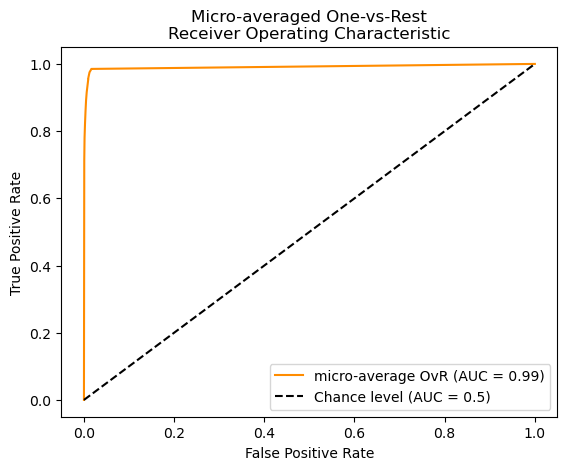

In [139]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### outputevents

In [140]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "output_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "output_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "output_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "output_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [141]:
X_train

,value,days_since_admission,recording_delay,itemid_226559,itemid_226560,itemid_226561,itemid_226567,itemid_226571,itemid_226573,itemid_226575,...,itemid_226626,itemid_226627,itemid_226631,itemid_226632,itemid_226633,itemid_227488,itemid_227489,itemid_227510,itemid_227511,itemid_227701
0,350,2 days 08:31:00,0 days 00:39:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,0 days 20:45:00,0 days 00:08:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,300,2 days 03:02:00,0 days 00:15:00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,50,6 days 03:26:00,0 days 02:57:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,200,4 days 13:26:00,0 days 00:53:00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,35,1 days 22:01:00,0 days 00:10:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291,150,5 days 16:32:00,0 days 01:41:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6292,75,5 days 20:26:00,0 days 00:44:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6293,50,0 days 20:04:00,0 days 00:02:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
X_test

,value,days_since_admission,recording_delay,itemid_226559,itemid_226560,itemid_226561,itemid_226567,itemid_226571,itemid_226573,itemid_226575,...,itemid_226626,itemid_226627,itemid_226631,itemid_226632,itemid_226633,itemid_227488,itemid_227489,itemid_227510,itemid_227511,itemid_227701
0,65,2 days 13:41:00,0 days 00:05:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80,3 days 12:26:00,0 days 00:42:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,9 days 02:44:00,0 days 01:04:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,450,0 days 13:32:00,0 days 00:43:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,3 days 09:52:00,-1 days +23:59:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,60,3 days 05:17:00,0 days 00:15:00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1570,0,3 days 14:11:00,0 days 00:01:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1571,150,6 days 00:29:00,-1 days +23:53:00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1572,300,5 days 03:17:00,0 days 00:00:00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
y_train

,careunit
0,Medicine/Cardiology
1,Vascular
2,Med/Surg/Trauma
3,Medicine
4,Medicine
...,...
6290,Medicine/Cardiology
6291,Cardiac Surgery
6292,Medicine
6293,Medical/Surgical Intensive Care Unit (MICU/SICU)


In [144]:
y_test

,careunit
0,Medicine
1,Medicine
2,Medical Intensive Care Unit (MICU)
3,Medicine
4,Cardiac Surgery
...,...
1569,Surgical Intensive Care Unit (SICU)
1570,Med/Surg/Trauma
1571,Medicine/Cardiology
1572,Neurology


In [145]:
# Fix if needed

In [146]:
X_train['days_since_admission']= X_train['days_since_admission'].apply(convert_to_days)
X_test['days_since_admission']= X_test['days_since_admission'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)

#### Bootstrap Aggregating

In [147]:
# 2 minutes to train

In [148]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:05<00:00,  1.52it/s]

Accuracy: 0.35324015247776364
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.43      0.57      0.49       254
    Cardiac Vascular Intensive Care Unit (CVICU)       0.06      0.03      0.04        30
                        Coronary Care Unit (CCU)       0.40      0.17      0.24        12
                             Hematology/Oncology       0.23      0.18      0.20        56
                Hematology/Oncology Intermediate       0.22      0.36      0.27        14
                                        Med/Surg       0.16      0.20      0.18        82
                                    Med/Surg/GYN       0.00      0.00      0.00        14
                                 Med/Surg/Trauma       0.39      0.43      0.41       249
              Medical Intensive Care Unit (MICU)       0.10      0.09      0.10        55
Medical/Surgical Intensive Care Unit (MICU/SIC

In [149]:
y_score = bagging_clf.predict_proba(X_test)

In [150]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1574, 21)

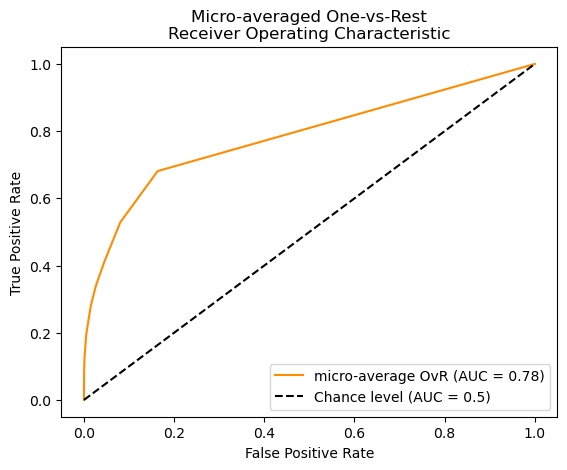

In [151]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### procedureevents

In [152]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "procedure_events_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "procedure_events_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "procedure_events_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "procedure_events_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [153]:
X_train

,value,patientweight,isopenbag,ORIGINALAMOUNT,ORIGINALRATE,duration,recording_delay,location_Left Accessory Basilic,location_Left Accessory Cephalic,location_Left Antecubital,...,itemid_228128,itemid_228129,itemid_228286,itemid_228715,itemid_229351,itemid_229380,itemid_229526,itemid_229532,itemid_229581,itemid_229586
0,999.0,88.7,1,999.0,1,0 days 16:39:00,0 days 00:00:43.800000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,143.0,0,1.0,0,0 days 00:01:00,0 days 04:32:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,103.0,0,1.0,0,0 days 00:01:00,-1 days +23:59:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,127.0,0,1.0,0,0 days 00:01:00,0 days 04:38:00,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.0,49.8,0,1.0,0,0 days 00:01:00,0 days 00:13:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,660.0,80.0,1,660.0,1,0 days 11:00:00,0 days 00:10:00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
974,2745.0,64.0,1,2745.0,1,1 days 21:45:00,0 days 00:24:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
975,30.0,53.0,1,30.0,1,0 days 00:30:00,0 days 00:03:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,1873.0,80.1,1,1873.0,1,1 days 07:13:00,0 days 00:00:35.503000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
X_test

,value,patientweight,isopenbag,ORIGINALAMOUNT,ORIGINALRATE,duration,recording_delay,location_Left Accessory Basilic,location_Left Accessory Cephalic,location_Left Antecubital,...,itemid_228128,itemid_228129,itemid_228286,itemid_228715,itemid_229351,itemid_229380,itemid_229526,itemid_229532,itemid_229581,itemid_229586
0,2003.0,83.5,1,2003.0,1,1 days 09:23:00,0 days 00:08:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5934.0,108.0,1,5934.0,1,4 days 02:54:00,0 days 14:01:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,290.0,97.3,1,290.0,1,0 days 04:50:00,0 days 00:00:56.380000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,703.0,97.0,1,703.0,1,0 days 11:43:00,0 days 00:01:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,301.0,67.3,1,301.0,1,0 days 05:01:00,0 days 00:26:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2444.0,74.8,1,2444.0,1,1 days 16:44:00,0 days 00:32:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,4038.0,77.4,1,4038.0,1,2 days 19:18:00,0 days 05:32:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,2235.0,127.7,1,2235.0,1,1 days 13:15:00,0 days 00:01:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,2303.0,117.0,1,2303.0,1,1 days 14:23:00,0 days 00:48:00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
y_train

,careunit
0,PACU
1,Med/Surg/Trauma
2,Medicine
3,Medicine
4,Medicine
...,...
973,Med/Surg/Trauma
974,Neurology
975,Neurology
976,Medicine


In [156]:
y_test

,careunit
0,Medicine/Cardiology
1,Medicine
2,Med/Surg/Trauma
3,Cardiac Surgery
4,Med/Surg/GYN
...,...
240,Cardiac Surgery
241,Vascular
242,Hematology/Oncology Intermediate
243,Transplant


In [157]:
# Fix if needed

In [158]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)

#### Bootstrap Aggregating

In [159]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.27it/s]

Accuracy: 0.7510204081632653
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.72      0.64      0.67        44
    Cardiac Vascular Intensive Care Unit (CVICU)       0.25      0.20      0.22         5
                        Coronary Care Unit (CCU)       1.00      0.67      0.80         3
                             Hematology/Oncology       0.75      0.75      0.75         8
                Hematology/Oncology Intermediate       1.00      0.25      0.40         4
                                        Med/Surg       0.86      0.80      0.83        15
                                    Med/Surg/GYN       1.00      0.75      0.86         8
                                 Med/Surg/Trauma       0.83      0.95      0.89        37
              Medical Intensive Care Unit (MICU)       0.56      0.71      0.63         7
Medical/Surgical Intensive Care Unit (MICU/SICU

In [160]:
y_score = bagging_clf.predict_proba(X_test)

In [161]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(245, 20)

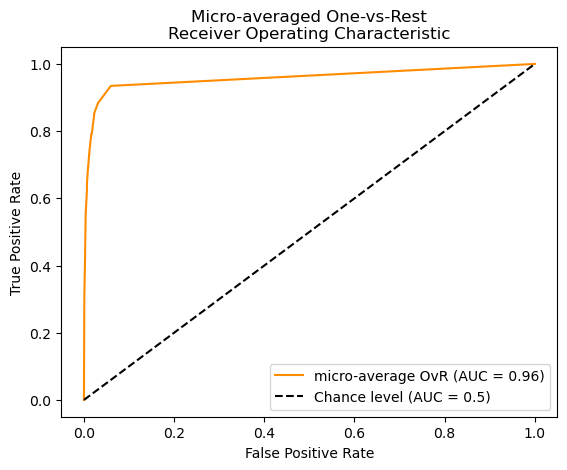

In [162]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### datetimeevents

In [163]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "datetime_events_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "datetime_events_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "datetime_events_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "datetime_events_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [164]:
X_train

,itemid_224183,itemid_224184,itemid_224185,itemid_224186,itemid_224187,itemid_224261,itemid_224262,itemid_224279,itemid_224280,itemid_224282,...,itemid_227911,itemid_228291,itemid_228793,itemid_228794,itemid_229352,itemid_229353,itemid_229732,itemid_229733,itemid_229738,itemid_229739
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10391,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
X_test

,itemid_224183,itemid_224184,itemid_224185,itemid_224186,itemid_224187,itemid_224261,itemid_224262,itemid_224279,itemid_224280,itemid_224282,...,itemid_227911,itemid_228291,itemid_228793,itemid_228794,itemid_229352,itemid_229353,itemid_229732,itemid_229733,itemid_229738,itemid_229739
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
y_train

,careunit
0,Cardiac Surgery
1,Emergency Department
2,Discharge Lounge
3,Medicine
4,Med/Surg/Trauma
...,...
10390,Medicine/Cardiology
10391,Medicine/Cardiology
10392,Med/Surg/Trauma
10393,Medical/Surgical Intensive Care Unit (MICU/SICU)


In [167]:
y_test

,careunit
0,Medicine/Cardiology
1,Med/Surg/Trauma
2,Medicine
3,Emergency Department
4,PACU
...,...
2594,Discharge Lounge
2595,Discharge Lounge
2596,Neurology
2597,Emergency Department


#### Bootstrap Aggregating

In [168]:
# Takes a few minutes to train

In [169]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.45it/s]


Accuracy: 0.33782223932281646
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.45      0.12      0.19       108
    Cardiac Vascular Intensive Care Unit (CVICU)       0.20      0.01      0.02        83
                        Coronary Care Unit (CCU)       0.05      0.01      0.01       129
                                Discharge Lounge       0.47      0.35      0.40       127
                            Emergency Department       0.31      0.75      0.44       337
                             Hematology/Oncology       0.35      0.16      0.22        74
                Hematology/Oncology Intermediate       0.00      0.00      0.00         4
                                        Med/Surg       0.00      0.00      0.00        69
                                    Med/Surg/GYN       0.00      0.00      0.00         7
                                 Med/Surg/Trau

In [170]:
y_score = bagging_clf.predict_proba(X_test)

In [171]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(2599, 23)

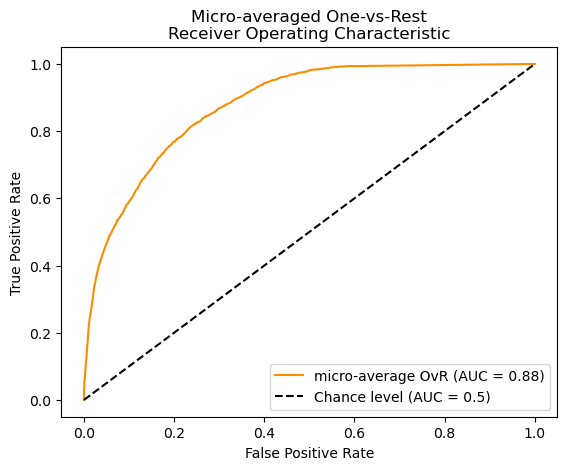

In [172]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### Trying the others to see if any better (they aren't)

#### Multinomial logistic regression

Models the probability of each class as a function of input features
Hypothesis function maps features to class probabilities (typically softmax function)
Define cost function (typically cross-entropy loss)
Optomization algorithm to minimize cost function and learn weights e.g. gradient descent (compute gradient of cost function wrt weights) , may use mini-batch GD or SGD for efficiency 
L1 or L1 regularization terms to keep model weights small 

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.33782223932281646
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.45      0.12      0.19       108
    Cardiac Vascular Intensive Care Unit (CVICU)       0.20      0.01      0.02        83
                        Coronary Care Unit (CCU)       0.05      0.01      0.01       129
                                Discharge Lounge       0.47      0.35      0.40       127
                            Emergency Department       0.31      0.75      0.44       337
                             Hematology/Oncology       0.35      0.16      0.22        74
                Hematology/Oncology Intermediate       0.00      0.00      0.00         4
                                        Med/Surg       0.00      0.00      0.00        69
                                    Med/Surg/GYN       0.00      0.00      0.00         7
                                 Med/Surg/Trau

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

#### Decision tree

In [145]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
# You can specify hyperparameters like max_depth, min_samples_split, etc.
# Here, we're using a default configuration.
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.339361292804925
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.47      0.15      0.23       108
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00        83
                        Coronary Care Unit (CCU)       0.05      0.01      0.01       129
                                Discharge Lounge       0.47      0.35      0.40       127
                            Emergency Department       0.31      0.76      0.44       337
                             Hematology/Oncology       0.35      0.16      0.22        74
                Hematology/Oncology Intermediate       0.00      0.00      0.00         4
                                        Med/Surg       0.00      0.00      0.00        69
                                    Med/Surg/GYN       0.00      0.00      0.00         7
                                 Med/Surg/Trauma

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K Neighbours classifier

Lazy K star implementation is too involved so using parameters of the sklearn implementation to get a similar functionality
Hamming distance metric only considers shared attributes so lazy classification

In [146]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier with algorithm='auto' and metric='hamming'
clf = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='hamming')

# Train the classifier (lazy learning)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.2223932281646787
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.24      0.16      0.19       108
    Cardiac Vascular Intensive Care Unit (CVICU)       0.04      0.05      0.04        83
                        Coronary Care Unit (CCU)       0.11      0.35      0.16       129
                                Discharge Lounge       0.50      0.27      0.35       127
                            Emergency Department       0.25      0.45      0.32       337
                             Hematology/Oncology       0.50      0.14      0.21        74
                Hematology/Oncology Intermediate       0.00      0.00      0.00         4
                                        Med/Surg       0.02      0.03      0.02        69
                                    Med/Surg/GYN       0.00      0.00      0.00         7
                                 Med/Surg/Traum

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBoost

In [147]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the labels column
y_train_encoded = label_encoder.fit_transform(np.ravel(y_train))

y_train_encoded

array([ 0,  4,  3, ...,  9, 11,  4])

In [148]:
# 12 minutes to train 

In [149]:
import xgboost as xgb

# Instantiate the XGBClassifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=29, random_state=42)

for i in tqdm(range(100)):
    # Train the classifier
    clf.fit(X_train, y_train_encoded)

# Make predictions on the testing set
y_pred = clf.predict(X_test)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:36<00:00,  5.17s/it]


In [150]:
y_test_encoded = label_encoder.fit_transform(np.ravel(y_test))

In [151]:
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3274336283185841
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.13      0.19       108
           1       0.00      0.00      0.00        83
           2       0.05      0.01      0.01       129
           3       0.42      0.28      0.33       127
           4       0.30      0.75      0.43       337
           5       0.39      0.16      0.23        74
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        69
           8       0.00      0.00      0.00         7
           9       0.21      0.71      0.33       218
          10       0.31      0.12      0.17       215
          11       0.44      0.29      0.35       224
          12       0.44      0.67      0.53       397
          13       0.50      0.03      0.05       144
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00         6
          16       0.15      

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

#### AdaBoost

In [ ]:
#  minutes to train

In [153]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=42)

for i in tqdm(range(100)):
    # Train the classifier
    clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:50<00:00,  2.31s/it]
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.21200461716044633
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.00      0.00      0.00       108
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00        83
                        Coronary Care Unit (CCU)       0.00      0.00      0.00       129
                                Discharge Lounge       0.00      0.00      0.00       127
                            Emergency Department       0.17      0.99      0.29       337
                             Hematology/Oncology       0.00      0.00      0.00        74
                Hematology/Oncology Intermediate       0.00      0.00      0.00         4
                                        Med/Surg       0.00      0.00      0.00        69
                                    Med/Surg/GYN       0.00      0.00      0.00         7
                                 Med/Surg/Trau

C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Linear DIscriminant Analysis

In [ ]:
#  minutes to train

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate the LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

for i in tqdm(range(100)):
    # Train the LDA model
    lda.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.39it/s]

Accuracy: 0.30165448249326665
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.29      0.24      0.26       108
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00        83
                        Coronary Care Unit (CCU)       0.39      0.34      0.36       129
                                Discharge Lounge       0.47      0.35      0.40       127
                            Emergency Department       0.31      0.60      0.41       337
                             Hematology/Oncology       0.40      0.14      0.20        74
                Hematology/Oncology Intermediate       0.02      0.50      0.03         4
                                        Med/Surg       0.00      0.00      0.00        69
                                    Med/Surg/GYN       0.21      0.43      0.29         7
                                 Med/Surg/Trau


C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jenni\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### labevents

In [48]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "labevents_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "labevents_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "labevents_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "labevents_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [15]:
X_train

,value,valuenum,ref_range_lower,ref_range_upper,flag,admittime,days_since_admission,delay,priority_N/A,priority_ROUTINE,...,itemid_52286,itemid_52312,itemid_52369,itemid_52391,itemid_52419,itemid_52425,itemid_52427,itemid_52769,itemid_52955,itemid_53153
0,137.0,137.0,133.0,145.0,0,2120-05-12 12:53:00,1 days 04:46:00,0 days 01:03:00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,58.1,58.1,25.0,36.5,1,2115-10-09 20:28:00,2 days 01:22:00,0 days 00:26:00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32.3,32.3,32.0,37.0,0,2187-02-10 18:57:00,1 days 18:31:00,0 days 00:20:00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,197.0,197.0,70.0,400.0,0,2137-08-04 00:07:00,5 days 05:10:00,0 days 07:00:00,0,1,...,0,0,0,0,0,0,0,0,0,0
4,30.7,30.7,26.0,32.0,0,2155-10-17 18:01:00,0 days 13:19:00,0 days 03:03:00,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29240,30.6,30.6,26.0,32.0,0,2155-07-10 17:48:00,2 days 15:34:00,0 days 00:32:00,0,0,...,0,0,0,0,0,0,0,0,0,0
29241,0.0,150.0,25.0,36.5,1,2175-03-20 23:29:00,1 days 06:35:00,0 days 02:17:00,0,0,...,0,0,0,0,0,0,0,0,0,0
29242,3.7,3.7,3.3,5.1,0,2166-08-21 23:09:00,1 days 12:04:00,0 days 00:59:00,0,0,...,0,0,0,0,0,0,0,0,0,0
29243,7.0,7.0,8.0,20.0,1,2112-09-17 19:13:00,8 days 04:47:00,0 days 01:08:00,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_test

,value,valuenum,ref_range_lower,ref_range_upper,flag,admittime,days_since_admission,delay,priority_N/A,priority_ROUTINE,...,itemid_52286,itemid_52312,itemid_52369,itemid_52391,itemid_52419,itemid_52425,itemid_52427,itemid_52769,itemid_52955,itemid_53153
0,8.9,8.9,8.4,10.3,0,2188-08-06 00:49:00,3 days 05:11:00,0 days 02:43:00,0,1,...,0,0,0,0,0,0,0,0,0,0
1,8.8,8.8,8.4,10.3,0,2112-09-17 19:13:00,3 days 04:47:00,0 days 01:12:00,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15.3,15.3,10.5,15.5,0,2148-08-22 15:18:00,1 days 16:46:00,0 days 01:27:00,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.4,1.4,2.7,4.5,1,2119-10-26 07:11:00,2 days 21:29:00,0 days 03:18:00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.3,12.3,10.5,15.5,0,2161-04-27 07:15:00,0 days 03:25:00,0 days 00:11:00,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7307,7.8,7.8,8.4,10.3,1,2148-08-22 15:18:00,5 days 22:42:00,0 days 01:04:00,0,0,...,0,0,0,0,0,0,0,0,0,0
7308,8.5,8.5,14.0,18.0,1,2174-12-04 11:28:00,9 days 16:39:00,0 days 00:40:00,0,0,...,0,0,0,0,0,0,0,0,0,0
7309,2.1,2.1,1.6,2.6,0,2177-03-12 07:15:00,3 days 02:56:00,0 days 03:10:00,0,0,...,0,0,0,0,0,0,0,0,0,0
7310,35.9,35.9,25.0,36.5,0,2148-06-30 01:09:00,1 days 22:20:00,0 days 07:41:00,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train

,careunit
0,Cardiac Surgery
1,Medicine/Cardiology
2,Hematology/Oncology
3,PACU
4,Hematology/Oncology Intermediate
...,...
29240,Hematology/Oncology Intermediate
29241,Medicine/Cardiology
29242,Neurology
29243,Hematology/Oncology


In [18]:
y_test

,careunit
0,Medicine
1,Hematology/Oncology
2,Hematology/Oncology Intermediate
3,Med/Surg/Trauma
4,Cardiac Surgery
...,...
7307,Hematology/Oncology Intermediate
7308,Neurology
7309,Neurology
7310,Medicine/Cardiology


In [ ]:
# X_train['duration']= X_train['duration'].apply(convert_to_days)
# X_test['duration']= X_test['duration'].apply(convert_to_days)

#### Bootstrap Aggregating

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

### chartevents

In [175]:
# path = "C:/Users/jenni/OneDrive/Desktop/IP/"

# file = "chart_data_train.csv"
# full_path = path + file
# X_train = pd.read_csv(full_path)

# file = "chart_data_test.csv"
# full_path = path + file
# X_test = pd.read_csv(full_path)

# file = "chart_label_train.csv"
# full_path = path + file
# y_train = pd.read_csv(full_path)

# file = "chart_label_test.csv"
# full_path = path + file
# y_test = pd.read_csv(full_path)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
# X_train['duration']= X_train['duration'].apply(convert_to_days)
# X_test['duration']= X_test['duration'].apply(convert_to_days)

#### Bootstrap Aggregating

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

## Tuning Bagging

In [1]:
# External libraries for data processing
import numpy as np
import pandas as pd
import sklearn as sk
#To render graphs within notebook
%matplotlib inline
import matplotlib.pyplot as plt
import joblib 
import os
from tqdm import tqdm

# Versions of libraries
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Scikit version: {}".format(sk.__version__))

Numpy version: 1.24.3
Pandas version: 1.5.3
Scikit version: 1.3.0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
def convert_to_days(duration_str):
    parts = duration_str.split(' days ')  # Split string into form ['22', '20:55:00']
    days = float(parts[0])  # Extract number of days and convert to float
    time_parts = parts[1].split(':')  # Split time part (hh:mm:ss) ['20', '55', '00']
    hours = float(time_parts[0])  # Extract hours and convert to float
    minutes = float(time_parts[1])  # Extract minutes and convert to float
    seconds = float(time_parts[2])  # Extract seconds and convert to float
    total_days = days + (hours / 24) + (minutes / (24 * 60)) + (seconds / (24 * 3600))  # Calculate total days
    return total_days

In [4]:
path = "C:/Project/Data/"

In [11]:
from sklearn.metrics import accuracy_score, classification_report

#### Bootstrap Aggregating

### emar

In [147]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "emar_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "emar_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "emar_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "emar_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [148]:
X_train['delay']= X_train['delay'].apply(convert_to_days)
X_test['delay']= X_test['delay'].apply(convert_to_days)

# drop unneeded columns 
X_train = X_train.drop(columns=['charttime'])
X_test = X_test.drop(columns=['charttime'])

#### Bootstrap Aggregating

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

Bagging classifier parameters:
- n_estimators int, default=10
- max_samples int or float, default=1.0
- max_features int or float, default=1.0
- bootstrap bool, default=True
- bootstrap_features bool, default=False
- verbose int, default=0
    - Controls the verbosity when fitting and predicting

In [151]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42) # best as default


# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:06<00:00,  3.07s/it]


Accuracy: 0.4978753541076487
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.29      0.34      0.31       170
    Cardiac Vascular Intensive Care Unit (CVICU)       0.00      0.00      0.00         8
                 Cardiology Surgery Intermediate       0.00      0.00      0.00         3
                        Coronary Care Unit (CCU)       0.52      0.51      0.51        99
                                Discharge Lounge       1.00      1.00      1.00         5
                            Emergency Department       0.00      0.00      0.00         1
                Emergency Department Observation       0.43      0.45      0.44        33
                             Hematology/Oncology       0.65      0.56      0.61       294
                Hematology/Oncology Intermediate       0.83      0.78      0.80       128
                                        Med/Sur

### microbiologyevents

In [91]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "microbio_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "microbio_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "microbio_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "microbio_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [92]:
X_train['delay']= X_train['delay'].apply(convert_to_days)
X_test['delay']= X_test['delay'].apply(convert_to_days)
X_train['days_since_admission']= X_train['days_since_admission'].apply(convert_to_days)
X_test['days_since_admission']= X_test['days_since_admission'].apply(convert_to_days)

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

Bagging classifier parameters:
- n_estimators int, default=10
- max_samples int or float, default=1.0
- max_features int or float, default=1.0
- bootstrap bool, default=True
- bootstrap_features bool, default=False
- verbose int, default=0
    - Controls the verbosity when fitting and predicting

#### Bootstrap Aggregating

In [117]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,criterion='entropy',max_leaf_nodes=1000)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=12, random_state=42)


# Train the BaggingClassifier
bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 0.7012987012987013

Accuracy: 0.7012987012987013
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.79      0.61      0.69        18
    Cardiac Vascular Intensive Care Unit (CVICU)       0.33      0.50      0.40         2
                        Coronary Care Unit (CCU)       0.00      0.00      0.00         1
                                Discharge Lounge       0.00      0.00      0.00         0
                             Hematology/Oncology       0.72      0.78      0.75        27
                Hematology/Oncology Intermediate       1.00      1.00      1.00         5
                                        Med/Surg       0.80      0.92      0.86        26
                                    Med/Surg/GYN       0.78      0.88      0.82         8
                                 Med/Surg/Trauma       0.52      1.00      0.69        12
              Medical Intensive Care Unit (MICU

### prescriptions

In [12]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "prescriptions_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "prescriptions_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "prescriptions_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "prescriptions_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [13]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)

#### Bootstrap Aggregating

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

In [161]:
# Takes 20 minutes to train

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,criterion='entropy')

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

### ingredientevents

In [173]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "ingredient_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "ingredient_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "ingredient_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "ingredient_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [174]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)

#### Bootstrap Aggregating

In [175]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42) # best as all default

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=3, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

  7%|███████▉                                                                                                         | 7/100 [01:35<21:03, 13.58s/it]


KeyboardInterrupt: 

In [ ]:
y_score = bagging_clf.predict_proba(X_test)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

In [ ]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### inputevents

In [5]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "input_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "input_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "input_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "input_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [6]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)


#### Bootstrap Aggregating

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

In [ ]:
# Takes 7 minutes to train

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,criterion='entropy')

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 0.9085153529597974

  3%|██▍                                                                               | 3/100 [00:11<06:13,  3.85s/it]


KeyboardInterrupt: 

### procedureevents

In [17]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "procedure_events_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "procedure_events_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "procedure_events_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "procedure_events_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [21]:
y_test.value_counts()

careunit                                        
Cardiac Surgery                                     44
Med/Surg/Trauma                                     37
Medicine                                            34
Medicine/Cardiology                                 19
Neurology                                           18
Med/Surg                                            15
PACU                                                 9
Vascular                                             9
Med/Surg/GYN                                         8
Hematology/Oncology                                  8
Trauma SICU (TSICU)                                  8
Medical Intensive Care Unit (MICU)                   7
Medical/Surgical Intensive Care Unit (MICU/SICU)     6
Cardiac Vascular Intensive Care Unit (CVICU)         5
Hematology/Oncology Intermediate                     4
Neuro Stepdown                                       4
Transplant                                           4
Medicine/Cardiol

In [9]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

Bagging classifier parameters:
- n_estimators int, default=10
- max_samples int or float, default=1.0
- max_features int or float, default=1.0
- bootstrap bool, default=True
- bootstrap_features bool, default=False
- verbose int, default=0
    - Controls the verbosity when fitting and predicting

#### Bootstrap Aggregating

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,criterion='entropy',min_samples_leaf=2)
# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42,bootstrap=False,bootstrap_features=True)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 0.8081632653061225

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.62it/s]

Accuracy: 0.8081632653061225
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.82      0.70      0.76        44
    Cardiac Vascular Intensive Care Unit (CVICU)       0.38      0.60      0.46         5
                        Coronary Care Unit (CCU)       1.00      0.33      0.50         3
                             Hematology/Oncology       0.78      0.88      0.82         8
                Hematology/Oncology Intermediate       1.00      0.50      0.67         4
                                        Med/Surg       0.73      0.73      0.73        15
                                    Med/Surg/GYN       1.00      1.00      1.00         8
                                 Med/Surg/Trauma       0.85      0.95      0.90        37
              Medical Intensive Care Unit (MICU)       0.64      1.00      0.78         7
Medical/Surgical Intensive Care Unit (MICU/SICU

### Trying to fix overfitting

Reduce the complexity of the base estimator: Decision trees can easily overfit if they are too deep or have too many nodes. Try reducing the maximum depth (max_depth) or the minimum number of samples required to split a node (min_samples_split) of the decision tree base estimator.

Increase the number of base estimators: Bagging works by averaging the predictions of multiple models trained on different subsets of the data. Increasing the number of base estimators (trees) can help reduce overfitting by providing more robust predictions.

Use feature subsampling: In addition to bootstrapping (sampling with replacement) the training data, you can also randomly select a subset of features for each base estimator. This helps introduce diversity among the base estimators and can reduce overfitting

Regularization: Decision trees have regularization parameters that can help control overfitting, such as min_samples_leaf, max_features, and max_leaf_nodes. Experiment with different values for these parameters to find the optimal balance between bias and variance.

max_depth: how many questions to ask before reaching a conclusion
min_samples_split: how many samples belonging to the same label are similar enough to each other 
n_estimators: how long does it take to train
bootstrap_features: does it need extra randomness for generalisability?

In [1]:
# External libraries for data processing
import numpy as np
import pandas as pd
import sklearn as sk
#To render graphs within notebook
%matplotlib inline
import matplotlib.pyplot as plt
import joblib 
import os
from tqdm import tqdm

# Versions of libraries
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Scikit version: {}".format(sk.__version__))

Numpy version: 1.24.3
Pandas version: 1.5.3
Scikit version: 1.3.0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
def convert_to_days(duration_str):
    parts = duration_str.split(' days ')  # Split string into form ['22', '20:55:00']
    days = float(parts[0])  # Extract number of days and convert to float
    time_parts = parts[1].split(':')  # Split time part (hh:mm:ss) ['20', '55', '00']
    hours = float(time_parts[0])  # Extract hours and convert to float
    minutes = float(time_parts[1])  # Extract minutes and convert to float
    seconds = float(time_parts[2])  # Extract seconds and convert to float
    total_days = days + (hours / 24) + (minutes / (24 * 60)) + (seconds / (24 * 3600))  # Calculate total days
    return total_days

In [4]:
path = "C:/Project/Data/"

In [5]:
from sklearn.metrics import accuracy_score, classification_report

### emar

In [6]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "emar_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "emar_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "emar_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "emar_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [7]:
X_train['delay']= X_train['delay'].apply(convert_to_days)
X_test['delay']= X_test['delay'].apply(convert_to_days)

# drop unneeded columns 
X_train = X_train.drop(columns=['charttime'])
X_test = X_test.drop(columns=['charttime'])

#### Bootstrap Aggregating

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

Bagging classifier parameters:
- n_estimators int, default=10
- max_samples int or float, default=1.0
- max_features int or float, default=1.0
- bootstrap bool, default=True
- bootstrap_features bool, default=False
- verbose int, default=0
    - Controls the verbosity when fitting and predicting

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,max_depth=10) # best as default


# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


### microbiologyevents

In [91]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "microbio_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "microbio_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "microbio_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "microbio_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [92]:
X_train['delay']= X_train['delay'].apply(convert_to_days)
X_test['delay']= X_test['delay'].apply(convert_to_days)
X_train['days_since_admission']= X_train['days_since_admission'].apply(convert_to_days)
X_test['days_since_admission']= X_test['days_since_admission'].apply(convert_to_days)

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

Bagging classifier parameters:
- n_estimators int, default=10
- max_samples int or float, default=1.0
- max_features int or float, default=1.0
- bootstrap bool, default=True
- bootstrap_features bool, default=False
- verbose int, default=0
    - Controls the verbosity when fitting and predicting

#### Bootstrap Aggregating

In [117]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,criterion='entropy',max_leaf_nodes=1000)

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=12, random_state=42)


# Train the BaggingClassifier
bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 0.7012987012987013

Accuracy: 0.7012987012987013
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.79      0.61      0.69        18
    Cardiac Vascular Intensive Care Unit (CVICU)       0.33      0.50      0.40         2
                        Coronary Care Unit (CCU)       0.00      0.00      0.00         1
                                Discharge Lounge       0.00      0.00      0.00         0
                             Hematology/Oncology       0.72      0.78      0.75        27
                Hematology/Oncology Intermediate       1.00      1.00      1.00         5
                                        Med/Surg       0.80      0.92      0.86        26
                                    Med/Surg/GYN       0.78      0.88      0.82         8
                                 Med/Surg/Trauma       0.52      1.00      0.69        12
              Medical Intensive Care Unit (MICU

### prescriptions

In [12]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "prescriptions_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "prescriptions_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "prescriptions_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "prescriptions_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [13]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)

#### Bootstrap Aggregating

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

In [161]:
# Takes 20 minutes to train

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,criterion='entropy')

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

### ingredientevents

In [85]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "ingredient_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "ingredient_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "ingredient_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "ingredient_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [86]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)

#### Bootstrap Aggregating

In [89]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42) # best as all default

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=3, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [12:51<00:00,  7.71s/it]


Accuracy: 0.46878980891719746
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.50      0.62      0.55       456
    Cardiac Vascular Intensive Care Unit (CVICU)       0.74      0.54      0.62        74
                        Coronary Care Unit (CCU)       0.33      0.22      0.27        18
                             Hematology/Oncology       0.49      0.38      0.43       231
                Hematology/Oncology Intermediate       0.67      0.17      0.27        35
                                        Med/Surg       0.37      0.23      0.29       154
                                    Med/Surg/GYN       0.57      0.29      0.38        56
                                 Med/Surg/Trauma       0.43      0.54      0.48       590
              Medical Intensive Care Unit (MICU)       0.55      0.31      0.40       205
Medical/Surgical Intensive Care Unit (MICU/SIC

### inputevents

In [5]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "input_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "input_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "input_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "input_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [6]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)


#### Bootstrap Aggregating

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

In [ ]:
# Takes 7 minutes to train

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,criterion='entropy')

# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 0.9085153529597974

  3%|██▍                                                                               | 3/100 [00:11<06:13,  3.85s/it]


KeyboardInterrupt: 

### procedureevents

In [17]:
path = "C:/Users/jenni/OneDrive/Desktop/IP/"

file = "procedure_events_data_train.csv"
full_path = path + file
X_train = pd.read_csv(full_path)

file = "procedure_events_data_test.csv"
full_path = path + file
X_test = pd.read_csv(full_path)

file = "procedure_events_label_train.csv"
full_path = path + file
y_train = pd.read_csv(full_path)

file = "procedure_events_label_test.csv"
full_path = path + file
y_test = pd.read_csv(full_path)

In [21]:
y_test.value_counts()

careunit                                        
Cardiac Surgery                                     44
Med/Surg/Trauma                                     37
Medicine                                            34
Medicine/Cardiology                                 19
Neurology                                           18
Med/Surg                                            15
PACU                                                 9
Vascular                                             9
Med/Surg/GYN                                         8
Hematology/Oncology                                  8
Trauma SICU (TSICU)                                  8
Medical Intensive Care Unit (MICU)                   7
Medical/Surgical Intensive Care Unit (MICU/SICU)     6
Cardiac Vascular Intensive Care Unit (CVICU)         5
Hematology/Oncology Intermediate                     4
Neuro Stepdown                                       4
Transplant                                           4
Medicine/Cardiol

In [9]:
X_train['duration']= X_train['duration'].apply(convert_to_days)
X_test['duration']= X_test['duration'].apply(convert_to_days)
X_train['recording_delay']= X_train['recording_delay'].apply(convert_to_days)
X_test['recording_delay']= X_test['recording_delay'].apply(convert_to_days)

Decision tree parameters:
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter{“best”, “random”}, default=”best”
- max_depth int, default=None
- min_samples_split int or float, default=2
    - If int, then consider min_samples_split as the minimum number
    - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split
- min_samples_leaf int or float, default=1
- min_weight_fraction_leaf float, default=0.0
    - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided
- max_features int, float or {“sqrt”, “log2”}, default=None
    - Float to make it a fraction of input features
- max_leaf_nodes int, default=None
- min_impurity_decrease float, default=0.0
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value

Bagging classifier parameters:
- n_estimators int, default=10
- max_samples int or float, default=1.0
- max_features int or float, default=1.0
- bootstrap bool, default=True
- bootstrap_features bool, default=False
- verbose int, default=0
    - Controls the verbosity when fitting and predicting

#### Bootstrap Aggregating

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the base classifier (decision tree)
base_clf = DecisionTreeClassifier(random_state=42,criterion='entropy',min_samples_leaf=2)
# Instantiate the BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=10, random_state=42,bootstrap=False,bootstrap_features=True)

for i in tqdm(range(100)):
    # Train the BaggingClassifier
    bagging_clf.fit(X_train, np.ravel(y_train))

# Make predictions on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 0.8081632653061225

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.62it/s]

Accuracy: 0.8081632653061225
Classification Report:
                                                  precision    recall  f1-score   support

                                 Cardiac Surgery       0.82      0.70      0.76        44
    Cardiac Vascular Intensive Care Unit (CVICU)       0.38      0.60      0.46         5
                        Coronary Care Unit (CCU)       1.00      0.33      0.50         3
                             Hematology/Oncology       0.78      0.88      0.82         8
                Hematology/Oncology Intermediate       1.00      0.50      0.67         4
                                        Med/Surg       0.73      0.73      0.73        15
                                    Med/Surg/GYN       1.00      1.00      1.00         8
                                 Med/Surg/Trauma       0.85      0.95      0.90        37
              Medical Intensive Care Unit (MICU)       0.64      1.00      0.78         7
Medical/Surgical Intensive Care Unit (MICU/SICU